# Моделирование ПЭД

ПЭД - является асинхронным двигателем. Моделирование АД выполнялось при помощи схемы замещения





## Г - образная схема замещения

<img  src="pict/G_circuit.png" width="600"  >


### 1 Расчет параметров схемы замещения

#### 1.1 Расчет активных и индуктивных сопративлений 

$$ξ =  \frac{M_{ЭМН}}{М_Н} $$

Рекомендуется принять 1.05

Расчет вспомогательных коэффициентов:

$$a = \frac{\alpha_0}{ξ} \frac{1 - \eta_n}{\eta_n} \frac{1 - s_n}{s_n} - 1 $$

$$ R_m =\frac{3 U_n^2 (1-s_n)}{2 P_{2n} (\lambda + ξ -1)} $$

$$ G = \frac {1}{s_n^2} + \frac{2a}{s_n} + a^2$$

$$ b = \frac{\lambda + ξ -1 }{ξ} $$

Активное сопротивление обмотки ротора:
$$ r_2' = \frac{R_m}{G} (\frac{b}{s_n} + a + \sqrt{({(\frac{b}{s_n} + a)}^2 - G)}) $$

Активное сопротивление обмотки статора:

$$ r_1 = a r_2'$$

Индуктивное сопротивление обмоток для режима холостого хода:
$$ x_k = \sqrt{R_m^2 -2R_m r_1} $$

---
После нахождения сопротивлений возможно необходима проверка(или подгонка коэффициентов, для сходимости  ${P_2 \ или \ \ \lambda}$ )

$$ P_{2n} = \frac{3 U_n^2(1-s_n) r_2'/s_n}{ξ((r_1 + r_2'/s_n)^2 + x_k^2)} $$

$$ \lambda = \frac{3U_n^2}{2P_{2n}} \frac{1-s_n}{r_1 + \sqrt{r_1^2 + x_k^2}} +1-ξ$$


#### 1.2 Расчет характеристик АД при режиме холостого хода
Потребляемая мощность:
$$ P_{1n} = \frac{P_{2n}}{\eta_n} $$

Потребляемый ток:
$$ I_{1n} = \frac{P_{1n}}{3 \ U_n \ cos\varphi_n} $$

Приведенный ток в обмотке ротора;
$$ I_{2n}' = \frac{U_n}{\sqrt{x_k^2 + (r_2'/s_n + r_1)^2}} $$

Угол между $I_{1n} \  и \  U_n$
$$ \varphi_n = acos(cos\varphi_n) $$

Угол между $I_{2n} \  и \  U_n$

$$ \varphi_{2n} = arctg \frac{x_k}{r_1 + r_2'/s_n } $$

Ток холостого хода:

$$ I_0 = \sqrt{I_{1n}^2 +I_{2n}'^2 - 2 \ I_{2n}' \ I_{1n} \ cos(\varphi_n - \varphi_{2n}) } $$
Угол между $I_{1n} \  и \  I_{0}$

$$ \varphi_x = arccos\frac{I_{1n} \ cos\varphi_n - I_{2n}' cos\varphi_{2n}}{I_0} $$

Расписать про поправочный коэффициент Гридина для $I_0$ 

### 2. Механическая характеристика АД

Под механической характеристикой будем понимать зависимость параметров работы АД от скольжения 

Номинальная частота вращения ротора:
$$ f_n = f_o \ (1-s_n) $$

Номинальный момент:
$$ M_n = \frac{P_{2n}}{2 \ \pi \ f_n} $$

Момент холостого хода:
$$M_0 = M_n \ (\lambda -1 )$$

Момент ротора:
$$ M = \frac {3 \ U^2 \ r_2'/s}{2 \ \pi \ f_n \ ({x_k^2 + (r_2'/s + r_1)^2})} - M_0 $$

Приведенный ток в роторе: 
$$ I_2' = \frac{U}{\sqrt{x_k^2 + {(r_1 + r_2'\ /\ s) \ ^2}}} $$

Угол между $I_{2} \  и \  U$
$$ \varphi_2 = arctg \frac{x_k}{r_1 + r_2'/s } $$

Потребляемый ток статором:
$$ I_1 =  \sqrt{I_{0}^2 +I_{2}'^2 + 2 \ I_{2}' \ I_{x} \ cos(\varphi_x - \varphi_{2}) } $$

Коэффициент мощности:
$$ cos \varphi = \frac{I_{0} \ cos\varphi_x + I_{2}' cos\varphi_{2}}{I_1} $$

Частота вращения:
$$ n = 2  \pi  f \ (1 - s) $$

Потребляемая мощность статором:
$$P_1 = 3 U I_1 cos\varphi $$

Развиваемая можность ротором:
$$P_2 = M \  2  \pi  f $$

КПД:
$$\eta = \frac{P_2}{P_1} $$

In [13]:
# Параметры АД для теста(ПЭДН32-117-1000 Новомет)

nom_power__kW = 32
nom_voltage__V = 1000
nom_current__A = 26
nom_efficient = 0.835
nom_cos = 0.84
nom_slip = 0.05

work_voltage__V = 1000
frequency__Hz = 50

In [14]:
from g_circuit import calc_g_circuit, calc_resistances, motor_data_loading
from MotorBase import MotorBase

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import fsolve
from sklearn.metrics import mean_squared_error

def get_value(coefficient, motor_loading):
    value = coefficient[0] + coefficient[1] * motor_loading +  coefficient[2] * motor_loading**2 + coefficient[3] * \
    motor_loading**3 +coefficient[4] * motor_loading**4 +coefficient[5] * motor_loading**5 \
    + coefficient[6] * motor_loading**6
    return value

In [92]:
# Оптимизация коэффициентов
motor_lamda = 3
alfa_0 = 0.61
moments_division = 1.13

In [93]:
# Сопротивление схемы замещения расчитаем по методике Гридина
r_2, r_1, x_k = calc_resistances(nom_power__W=nom_power__kW*1e3,
                                 nom_voltage__V=nom_voltage__V,
                                 nom_slip=nom_slip,
                                 nom_efficient=nom_efficient,
                                 motor_lamda=motor_lamda,
                                 alfa_0=alfa_0,
                                 moments_division=moments_division)
print('r_2\' Om:',r_2,'r_1 Om:', r_1, 'x_k Om:', x_k)
# Проверка мощности по гридину
P_2n = 3 * nom_voltage__V **2 * (1 - nom_slip) * r_2 / nom_slip / (1.0399 * ((r_1 + r_2 / nom_slip)**2 + x_k **2))
print(P_2n)
# Проверка motor_lamda по Гридину
lamb = 3 * nom_voltage__V ** 2 / (2 * P_2n) * (1 - nom_slip)/ (r_1 + math.sqrt(r_1**2 + x_k**2)) + 1 - 1.05
print(lamb)

r_2' Om: 3.500644734028088 r_1 Om: 3.594324220578044 x_k Om: 10.006980327484957
34772.57428598903
2.8304309734513273


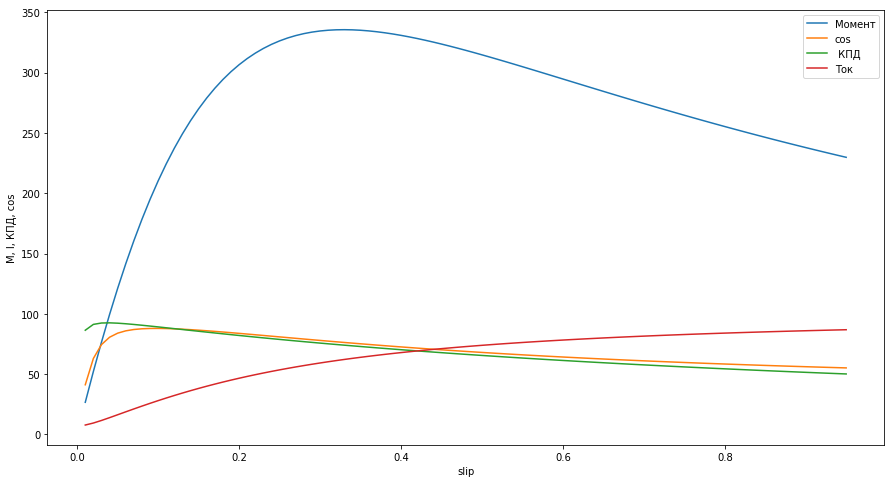

In [94]:
# Расчет механической характеристики ПЭД
slip = np.arange(0.01, 0.96, 0.01)

M_ = []
cos_ = []
efficient_ = []
I1_ = []
for s in slip: 
    M__Nm,  cos_fi, efficient, I1__A, power_2__kW = calc_g_circuit(slip=s, 
                                                        nom_power__W=nom_power__kW, 
                                                        nom_voltage__V=nom_voltage__V, 
                                                        nom_slip=nom_slip, 
                                                        nom_efficient=nom_efficient,
                                                        nom_cos=nom_cos,  
                                                        frequency__Hz=frequency__Hz, 
                                                        voltage__V=work_voltage__V,
                                                        r_1__Om=r_1, 
                                                        r_2__Om=r_2, 
                                                        x_k__Om=x_k,
                                                        moments_division=moments_division)
    M_.append(M__Nm)
    cos_.append(cos_fi)
    efficient_.append(efficient)
    I1_.append(I1__A)

# Построение графика
plt.figure(figsize=(15,8))
plt.plot(slip, M_, label='Момент')
plt.plot(slip, [cos * 100 for cos in cos_], label='cos')
plt.plot(slip, [eff*100 for eff in efficient_], label=' КПД')
plt.plot(slip, I1_, label='Ток')
plt.xlabel('slip')
plt.ylabel('M, I, КПД, cos')
plt.legend()
plt.show()

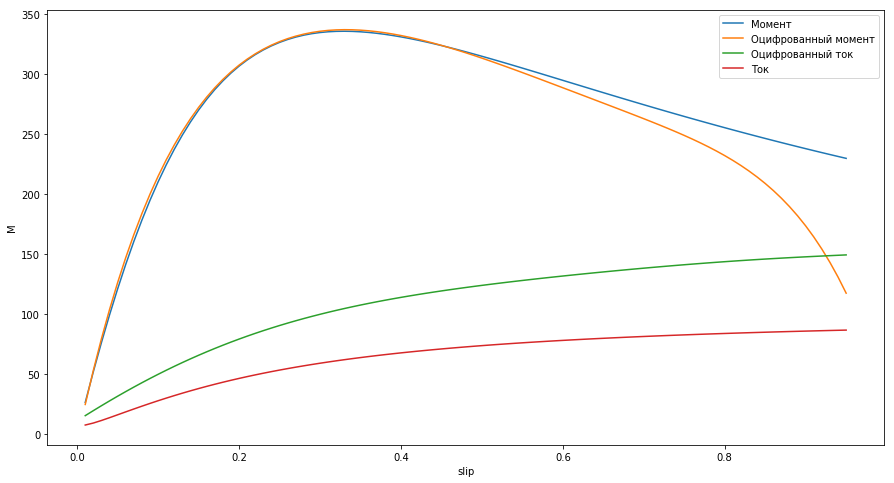

In [95]:
# Отцифрованная зависимость M = f(s)
moment_polinom = [-5.6509010861, 3177.87742718, -11909.8026561, 24928.4194211, 
                  -33374.4214357, 26129.2707625, -8916.98752073]
current_polinom = [11.4122076171, 427.952107282, -355.982094527, -796.5157608, 
                   2241.43901971, -2004.77870823, 627.467837903]
true_moment__Nm = []
true_current__A = []
for s in slip:
    moment = get_value(moment_polinom, s)
    current = get_value(current_polinom, s)
    true_moment__Nm.append(moment)
    true_current__A.append(current)
# Сравнение расчетных и отцифрованных значений момента на валу
plt.figure(figsize=(15,8))
plt.plot(slip, M_, label='Момент')
plt.plot(slip, true_moment__Nm, label='Оцифрованный момент')
plt.plot(slip, true_current__A, label='Оцифрованный ток')
plt.plot(slip, I1_, label='Ток')
plt.xlabel('slip')
plt.ylabel('M')
plt.legend()
plt.show()

In [110]:
# Оптимизация механической характеристики

def optimize_current(motor_lambda ,args):
    nom_power__kW, nom_voltage__V, nom_slip, nom_efficient, alfa_0, moments_division, polinom_data, slip = args
    r_2, r_1, x_k = calc_resistances(nom_power__kW*1e3, nom_voltage__V, nom_slip, nom_efficient, motor_lambda, alfa_0, moments_division)
    calc_data = []
    true_data = []
    for s in slip:
        _,  _, _, I1__A, _ = calc_g_circuit(slip=s, 
                                            nom_power__W=nom_power__kW * 1e3,
                                            nom_voltage__V=nom_voltage__V, 
                                            nom_slip=nom_slip, 
                                            nom_efficient=nom_efficient,
                                            nom_cos=nom_cos, 
                                            frequency__Hz=frequency__Hz, 
                                            voltage__V=work_voltage__V,
                                            r_1__Om=r_1, 
                                            r_2__Om=r_2, 
                                            x_k__Om=x_k,
                                            moments_division=moments_division)
        current = get_value(polinom_data, s)
        
        calc_data.append(I1__A)
        true_data.append(current)
        
    data_error = math.sqrt(mean_squared_error(true_data, calc_data))
    print(motor_lambda)
    return data_error

test_slip = np.arange(0.01, 0.91, 0.1)
print(fsolve(func=optimize_current, args=[nom_power__kW, nom_voltage__V, nom_slip, nom_efficient, alfa_0, 
    moments_division, current_polinom, test_slip], x0 = 2))

[2]
[2.]
[2.]
[2.00000003]
[5.17250773]


ValueError: math domain error

In [97]:
## Расчет показателей ПЭД в зависимости от загрузки 
power_2__kW = np.arange(5, 34, 0.5)
M_ = []
cos_ = []
efficient_ = []
I1_ = []
slip_ = []
P_2_ = []
for motor_power__kW in power_2__kW: 
    M__Nm,  cos_fi, efficient, I1__A, slip, P_2__kW = motor_data_loading(motor_power__kW*1e3, 
                                                        nom_power__W=nom_power__kW*1e3, 
                                                        nom_voltage__V=nom_voltage__V, 
                                                        nom_slip=nom_slip, 
                                                        nom_efficient=nom_efficient,
                                                        nom_cos=nom_cos,  
                                                        frequency__Hz=frequency__Hz, 
                                                        voltage__V=work_voltage__V,
                                                        r_1__Om=r_1, 
                                                        r_2__Om=r_2, 
                                                        x_k__Om=x_k,
                                                        moments_division=moments_division)
    M_.append(M__Nm)
    cos_.append(cos_fi)
    efficient_.append(efficient)
    I1_.append(I1__A)
    slip_.append(slip)
    P_2_.append(P_2__kW)


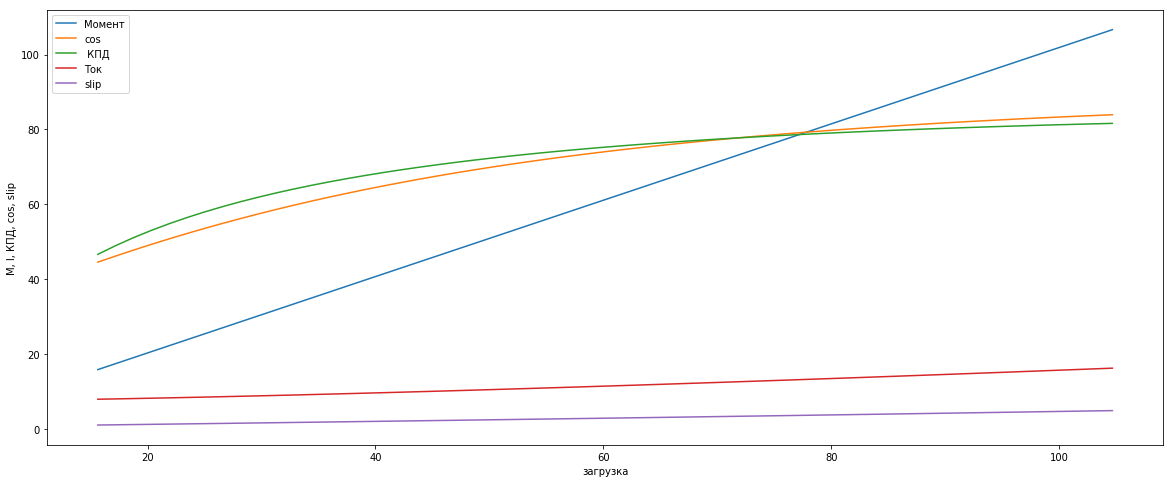

In [98]:
plt.figure(figsize=(20,8))
loading = [power / nom_power__kW * 100 for power in power_2__kW]
plt.plot(loading, M_, label='Момент')
plt.plot(loading, [cos * 100 for cos in cos_], label='cos')
plt.plot(loading, [eff*100 for eff in efficient_], label=' КПД')
plt.plot(loading, I1_, label='Ток')
plt.plot(loading, [s*100 for s in slip_], label='slip')
plt.xlabel('загрузка')
plt.ylabel('M, I, КПД, cos, slip')
plt.legend()
plt.show()

In [99]:
motor = MotorBase('Novomet', 50, 117)

In [100]:
# Получение оцифрованных данных для тестируемого ПЭД

motor = MotorBase('Novomet', 50, 117)

current_coeff = motor.current_coefficient
cos_coefficient = motor.cos_coefficient
frequency_coefficient = motor.frequency_coefficient
efficient_coefficient = motor.efficient_coefficient

In [101]:
# Получение оцифрованных данных
test_motor_loading = [power / nom_power__kW * 100 for power in power_2__kW]
true_current = []
true_efficient = []
true_cos = []

for loading in test_motor_loading: 
    current = get_value(current_coeff, loading) / 100 * nom_current__A
    cos = get_value(cos_coefficient, loading)
    efficient = get_value(efficient_coefficient, loading)
    true_current.append(current)
    true_efficient.append(efficient)
    true_cos.append(cos)

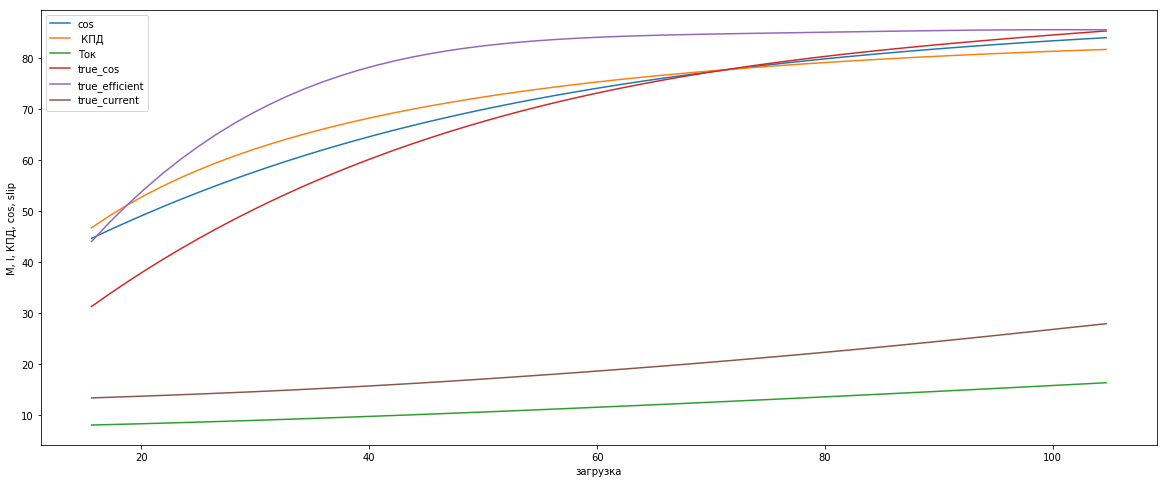

In [102]:
# Построение оцифрованных и расчетных параметров работы ПЭД
plt.figure(figsize=(20,8))
loading = [power / nom_power__kW * 100 for power in power_2__kW]
plt.plot(test_motor_loading, [cos * 100 for cos in cos_], label='cos')
plt.plot(test_motor_loading, [eff*100 for eff in efficient_], label=' КПД')
plt.plot(test_motor_loading, I1_, label='Ток')
plt.plot(test_motor_loading, true_cos, label='true_cos')
plt.plot(test_motor_loading, true_efficient, label='true_efficient')
plt.plot(test_motor_loading, true_current, label='true_current')
plt.xlabel('загрузка')
plt.ylabel('M, I, КПД, cos, slip')
plt.legend()
plt.show()

In [108]:
# Оптимизация по одному из коэффициентов и по одному из параметров
from scipy.optimize import fsolve

def f_1(moments_division, args):
    motor_loading, nom_power__W, nom_voltage__V, nom_slip, nom_efficient, nom_cos, frequency__Hz, voltage__V,\
    motor_lambda, alfa_0 = args
    r_2, r_1, x_k = calc_resistances(nom_power__W, nom_voltage__V, nom_slip, nom_efficient, motor_lambda, alfa_0, moments_division)
    power_2__kW = [nom_power__kW * loading for loading in motor_loading]
    true_data = []
    calc_data = []

    for i, _ in enumerate(power_2__kW):
        _,  _, cos_fi, _, _, _ = motor_data_loading(power_2__kW[i]*1e3, 
                                                   nom_power__W=nom_power__kW*1e3, 
                                                   nom_voltage__V=nom_voltage__V, 
                                                   nom_slip=nom_slip, 
                                                   nom_efficient=nom_efficient,
                                                   nom_cos=nom_cos, 
                                                   frequency__Hz=frequency__Hz, 
                                                   voltage__V=work_voltage__V, 
                                                   r_1__Om=r_1, 
                                                   r_2__Om=r_2, 
                                                   x_k__Om=x_k,
                                                   moments_division=moments_division)
        
        cos_fi_ = get_value(efficient_coefficient, motor_loading[i]) 
        true_data.append(cos_fi_ / 100)
        calc_data.append(cos_fi)

    error = math.sqrt(mean_squared_error(true_data, calc_data))
    return error

def optimize_motor_lambda(motor_loading, nom_power__W=nom_power__kW*1e3, nom_voltage__V=nom_voltage__V, 
                          nom_slip=nom_slip, nom_efficient=nom_efficient, nom_cos=nom_cos, frequency__Hz=50, 
                          voltage__V=nom_voltage__V, motor_lambda = 2, alfa_0=0.46):
    motor_lambda = fsolve(func=f_1, args=[motor_loading, nom_power__W, nom_voltage__V, nom_slip,
                                          nom_efficient, nom_cos, frequency__Hz, voltage__V, motor_lambda, alfa_0], x0=1.05)
    return motor_lambda

print(optimize_motor_lambda(motor_loading=test_motor_loading))

/usr/local/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


[1.32829547]


In [107]:
# Оптимизаци 3 коэффициентов

def f_1(variables, args):

    func = np.zeros(3)
    motor_lambda, alfa_0, moments_division = variables
    motor_loading, nom_power__W, nom_voltage__V, nom_slip, nom_efficient, nom_cos, frequency__Hz, voltage__V = args
    r_2, r_1, x_k = calc_resistances(nom_power__W, nom_voltage__V, nom_slip, nom_efficient, motor_lambda, alfa_0, moments_division)
    power_2__kW = [nom_power__kW * loading for loading in motor_loading]
    true_cos_fi = []
    calc_cos_fi = []
    
    calc_current = []
    true_current = []
    
    calc_efficient = []
    true_effecient = []

    for i, _ in enumerate(power_2__kW):
        _,  cos_fi, efficient, I1__A, _, _ = motor_data_loading(power_2__kW[i]*1e3, 
                                                   nom_power__W=nom_power__kW*1e3, 
                                                   nom_voltage__V=nom_voltage__V, 
                                                   nom_slip=nom_slip, 
                                                   nom_efficient=nom_efficient,
                                                   nom_cos=nom_cos, 
                                                   frequency__Hz=frequency__Hz, 
                                                   voltage__V=work_voltage__V, 
                                                   r_1__Om=r_1, 
                                                   r_2__Om=r_2, 
                                                   x_k__Om=x_k,
                                                   moments_division=moments_division)
        
        cos_fi_ = get_value(cos_coefficient, motor_loading[i]) / 100
        true_effecient_ = get_value(efficient_coefficient, motor_loading[i]) / 100
        true_current_ =  get_value(current_coeff, motor_loading[i]) / 100 * nom_current__A
        
        true_cos_fi.append(cos_fi_)
        calc_cos_fi.append(cos_fi)
        
        calc_current.append(I1__A)
        true_current.append(true_current_)
        
        calc_efficient.append(efficient)
        true_effecient.append(true_effecient_)

    cos_error = math.sqrt(mean_squared_error(true_cos_fi, calc_cos_fi))
    current_error = math.sqrt(mean_squared_error(true_current, calc_current))
    efficient_error = math.sqrt(mean_squared_error(true_effecient, calc_efficient))
    func[0] = cos_error
    func[1] = current_error
    func[2] = efficient_error
    print(func)
    return func

def optimize_motor_lambda(motor_loading, nom_power__W=nom_power__kW*1e3, nom_voltage__V=nom_voltage__V, 
                          nom_slip=nom_slip, nom_efficient=nom_efficient, nom_cos=nom_cos, frequency__Hz=50, 
                          voltage__V=nom_voltage__V):
    motor_lambda = fsolve(func=f_1, args=[motor_loading, nom_power__W, nom_voltage__V, nom_slip,
                                          nom_efficient, nom_cos, frequency__Hz, voltage__V], x0=np.array([1.7, 0.45, 1]))
    return motor_lambda
print(optimize_motor_lambda(motor_loading=test_motor_loading))

/usr/local/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[ 0.16614886 14.07521833  0.13848859]
[ 0.16614886 14.07521833  0.13848859]
[ 0.16614886 14.07521833  0.13848859]
[ 0.16614886 14.07521854  0.13848859]
[ 0.16614886 14.07521835  0.13848859]
[ 0.16614889 14.07521736  0.1384886 ]
[ 0.34247821 19.5217138   0.29785846]
[ 0.27052669 12.99791733  1.23407355]
[0.15726516 5.31025408 0.50181485]


ValueError: math domain error